In [1]:
library(purrr)

### Exercise 1
**a)** Posterior function can be found by the following proportionality

$$
P(\mu|\{y_j\}M) \propto f(\{y_j\}|\mu M) \times g(\mu | M)
$$

Supposing a uniform distribution we can assert that $g(\mu | M)=1$ for all the positive $\mu$, and then simplify from the precedent relation.

For a Poissonian process the Likelihood distribution is defined as

$$
f(\{y_j\}|\mu M) =\prod_{j=1}^{n} f(y_j|\mu M)  \propto \mu^{\sum y_{j}} \times \mathrm{e}^{-(n \mu)}
$$

and we can express it by the Gamma distribution, defined as 

$$
\operatorname{Gamma}(y | \alpha, \lambda)=k y^{\alpha-1} \mathrm{e}^{-\lambda y} 
\qquad 
$$

with

$$
\qquad k= \frac{\lambda^{\alpha}}{\Gamma(\alpha)}
$$

where $\alpha = \sum y_j + 1 = 13$ and $\lambda = n = 5$ (*number of samples*)

Riassuming we can find our Prior distribution for a Poisson process with the following relation

$$
P(\mu|\{y_j\}M) \propto f(\{y_j\}|\mu M) \times g(\mu | M) \propto \operatorname{Gamma}(y | \alpha, \lambda)
$$

and then use the R function *dgamma()*

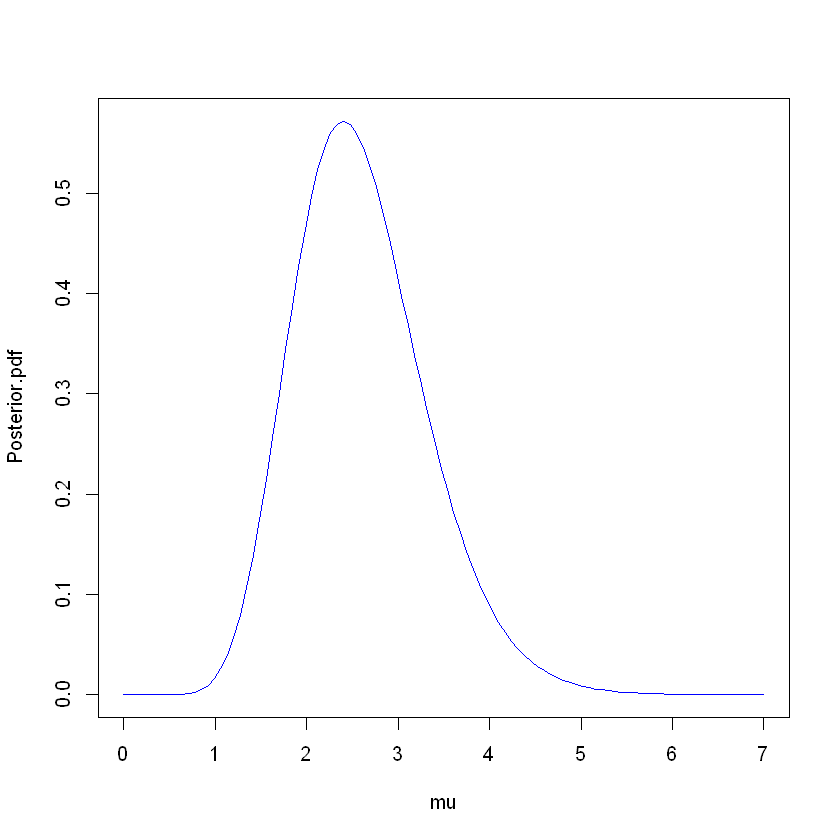

In [2]:
alpha <- 13
n <- 5
samples <- 100
mu <- seq(0,7, length.out = samples)
Posterior.pdf <- dgamma(mu, alpha, n)
plot(mu, Posterior.pdf, type='l', col='blue')

We can derive the mean and variance analitically by their defiition for a Gamma distribution
$$
E[\mu]=\frac{\alpha}{\lambda} \qquad \text{Var}[\mu]=\frac{\alpha}{\lambda^2}
$$

To compute them numerically we use the integral definition of expected value 

$$
E[\mu] = \int_{0}^{+\infty} \mu f(\mu) d\mu  
$$

using the R function *integrate()* and then compute the variance as

$$
\text{Var}[\mu] = E[\mu^2] - E[\mu]^2
$$

The median is defined as the value that separates the distribution values into two perfectly equal halves. It corresponds at the $q(x=0.5)$ where $q$ is the quantile function

In [3]:
#mean
analytical.mean <- alpha/n
integ <- integrate(function(x) {x*dgamma(x, alpha, n)}, 0, Inf)
numerical.mean <- integ$value

#variance
analytical.var <- alpha/(n*n)
E_x2 <- integrate(function(x) {x^2*dgamma(x, alpha, n)}, 0, Inf)
numerical.var <- E_x2$value - numerical.mean^2

#median
median <- qgamma(0.5, alpha, n)

print(paste("Analytical mean =", analytical.mean, " - Numerical mean =", numerical.mean))
print(paste("Analytical variance =", analytical.var, " - Numerical variance =", numerical.var))
print(paste("Median =", median))

[1] "Analytical mean = 2.6  - Numerical mean = 2.60000000000019"
[1] "Analytical variance = 0.52  - Numerical variance = 0.519999999999974"
[1] "Median = 2.53364581174773"


**b)** This point is very similar at the first one, but we use a Jeffrey’s prior, which in Poisson process is inversely proportional to $\sqrt(\mu)$. Applying the calculations we obtain, as before, that we can use the Gamma function where $\alpha = \sum y_j + \frac{1}{2} = 12.5$ and $\lambda = 5$ 

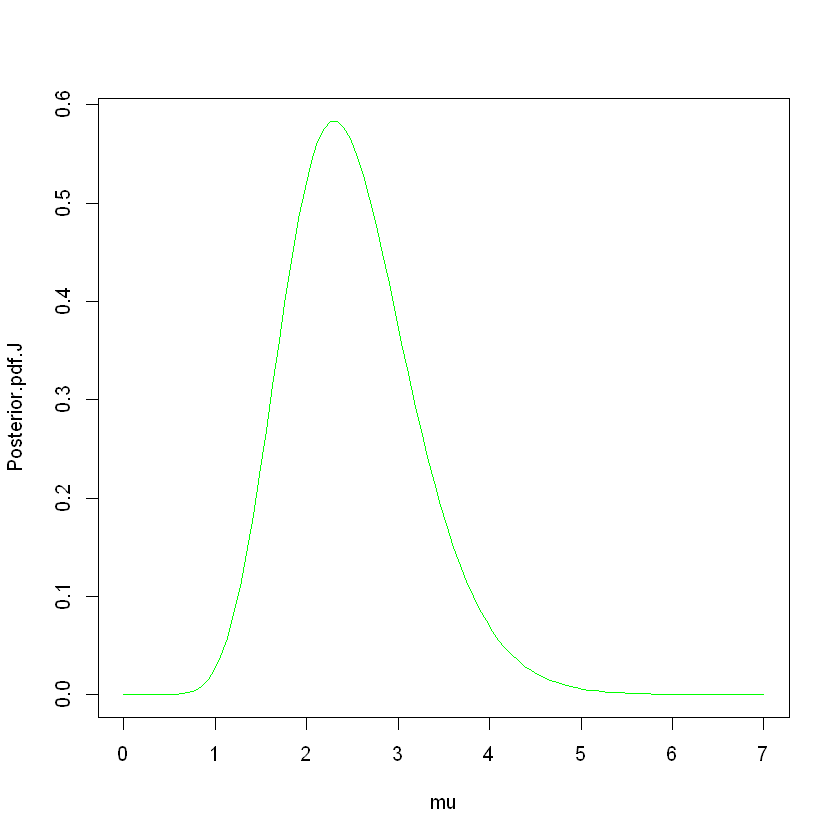

In [4]:
alpha.J <- 12.5
mu <- seq(0,7, length.out = samples)
Posterior.pdf.J <- dgamma(mu, alpha.J, n)
plot(mu, Posterior.pdf.J, type='l', col='green')

In [5]:
#mean
analytical.mean.J <- alpha.J/n
integ.J <- integrate(function(x) {x*dgamma(x, alpha.J, n)}, 0, Inf)
numerical.mean.J <- integ.J$value

#variance
analytical.var.J <- alpha.J/(n*n)
E_x2.J <- integrate(function(x) {x^2*dgamma(x, alpha.J, n)}, 0, Inf)
numerical.var.J <- E_x2.J$value - numerical.mean.J^2

#median
median.J <- qgamma(0.5, alpha.J, n)

print(paste("Analytical mean =", analytical.mean.J, " - Numerical mean =", numerical.mean.J))
print(paste("Analytical variance =", analytical.var.J, " - Numerical variance =", numerical.var.J))
print(paste("Median =", median.J))

[1] "Analytical mean = 2.5  - Numerical mean = 2.50000000000012"
[1] "Analytical variance = 0.5  - Numerical variance = 0.500000000000102"
[1] "Median = 2.43365866978843"


comparing the Posterior Distribution with Uniform and Jeffrey's Prior

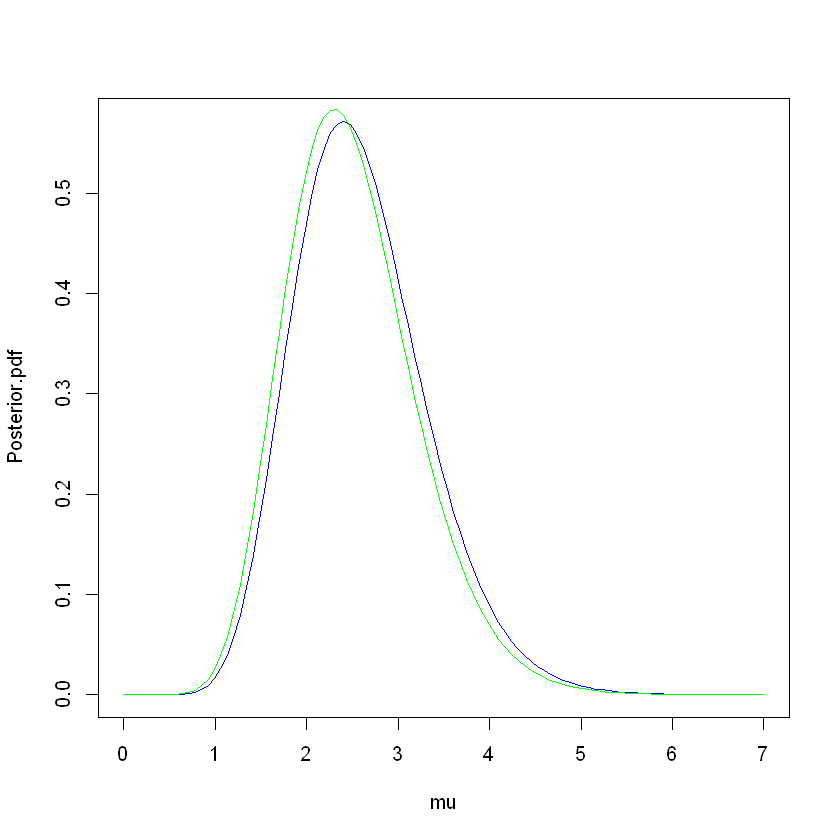

In [6]:
plot(mu,Posterior.pdf, col='blue', type='l')
lines(mu, Posterior.pdf.J, col='green')

**c)** To find the $95\%$ credibility interval we use qgamma in $0.025 - 0.975$ 

[1] "(Unifrom Prior) 95% credebility interval values are:  1.38439049820076 4.19231700963539"
[1] "(Jeffrey's Prior) 95% credebility interval values are:  1.31197200249378 4.06464691202752"


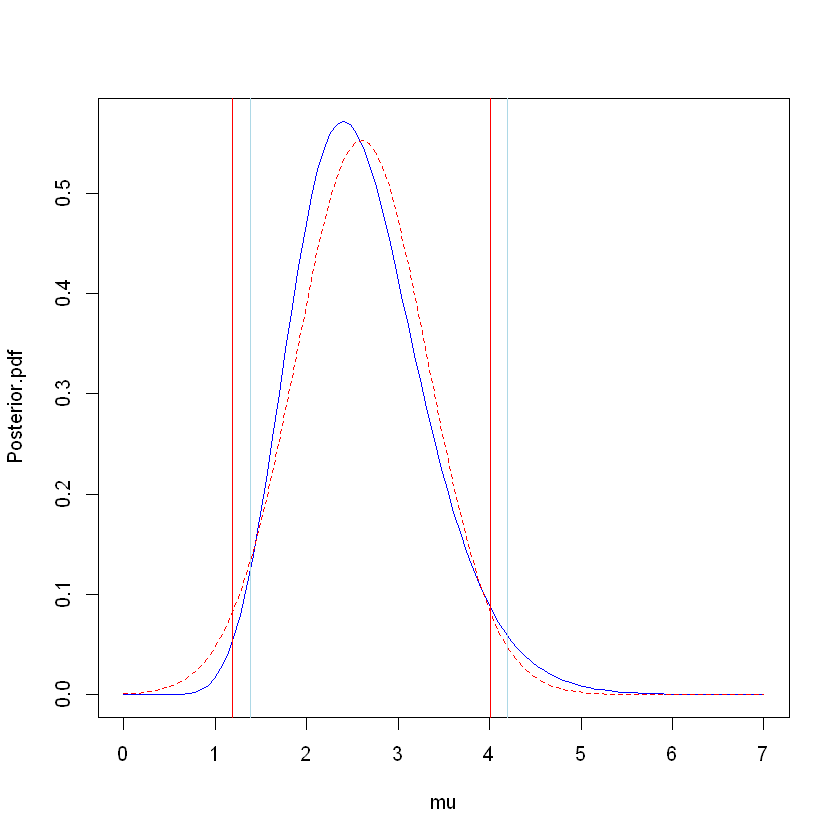

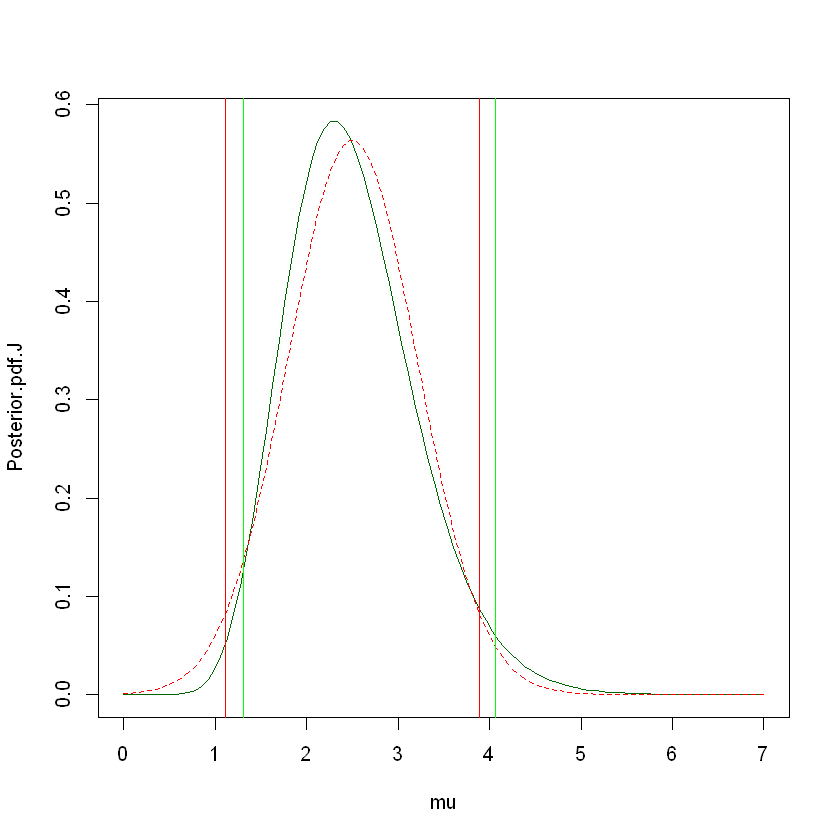

In [7]:
# Uniform Prior
U.q1 <- qgamma(0.025, alpha, n)
U.q2 <- qgamma(0.975, alpha, n)
print(paste("(Unifrom Prior) 95% credebility interval values are: ", U.q1, U.q2))
# and relative Gaussian values
U.norm <- dnorm(mu, numerical.mean, sqrt(numerical.var))
U.normq1 <- qnorm(0.025, numerical.mean, sqrt(numerical.var))
U.normq2 <- qnorm(0.975, numerical.mean, sqrt(numerical.var))
# plots
plot(mu, Posterior.pdf, col='blue', type='l')
lines(mu, U.norm, col='red', lty="dashed")
abline(v=U.q1, col='lightblue')
abline(v=U.q2, col='lightblue')
abline(v=U.normq1, col='red')
abline(v=U.normq2, col='red')

# Jeffrey Prior
J.q1 <- qgamma(0.025, alpha.J, n)
J.q2 <- qgamma(0.975, alpha.J, n)
print(paste("(Jeffrey's Prior) 95% credebility interval values are: ", J.q1, J.q2))
# and relative Gaussian values
J.norm <- dnorm(mu, numerical.mean.J, sqrt(numerical.var.J))
J.normq1 <- qnorm(0.025, numerical.mean.J, sqrt(numerical.var.J))
J.normq2 <- qnorm(0.975, numerical.mean.J, sqrt(numerical.var.J))
# plots
plot(mu, Posterior.pdf.J, col='darkgreen', type='l')
lines(mu, J.norm, col='red', lty="dashed")
abline(v=J.q1, col='green')
abline(v=J.q2, col='green')
abline(v=J.normq1, col='red')
abline(v=J.normq2, col='red')


### Exercise 2

How many data do you want to generate ? (data will be visualized in 5 steps) 300


[1]   5  78 152 226 300

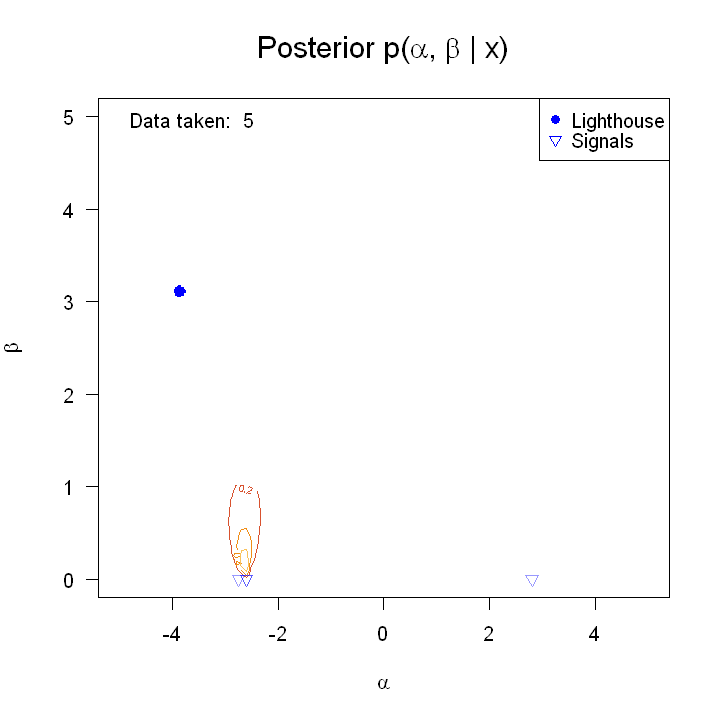

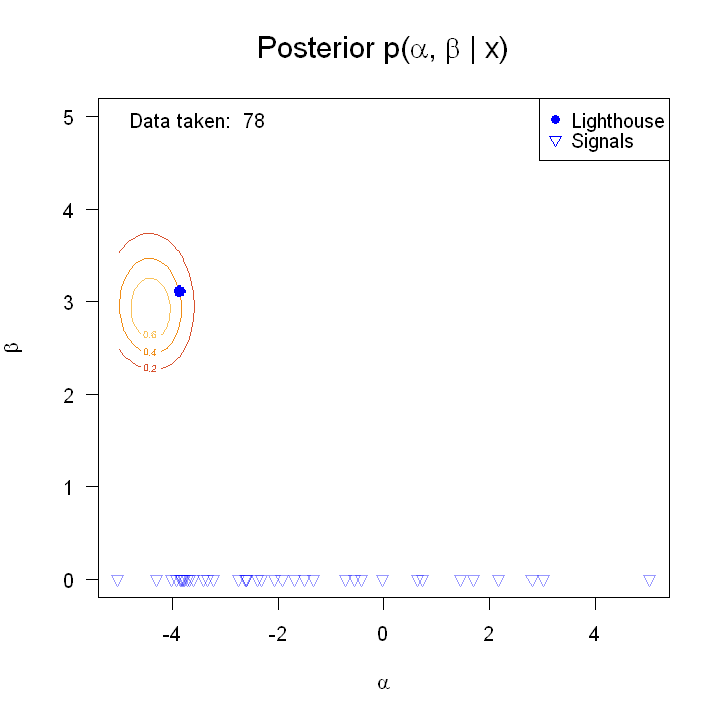

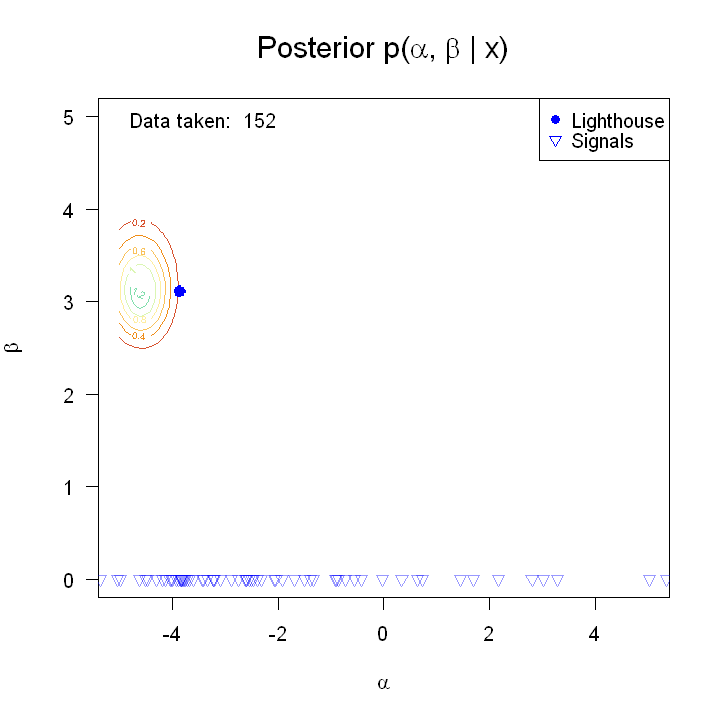

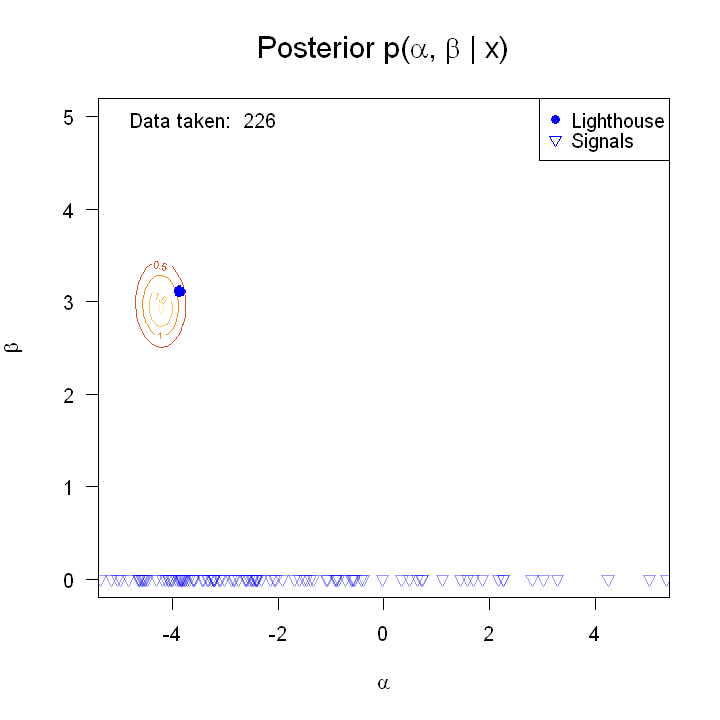

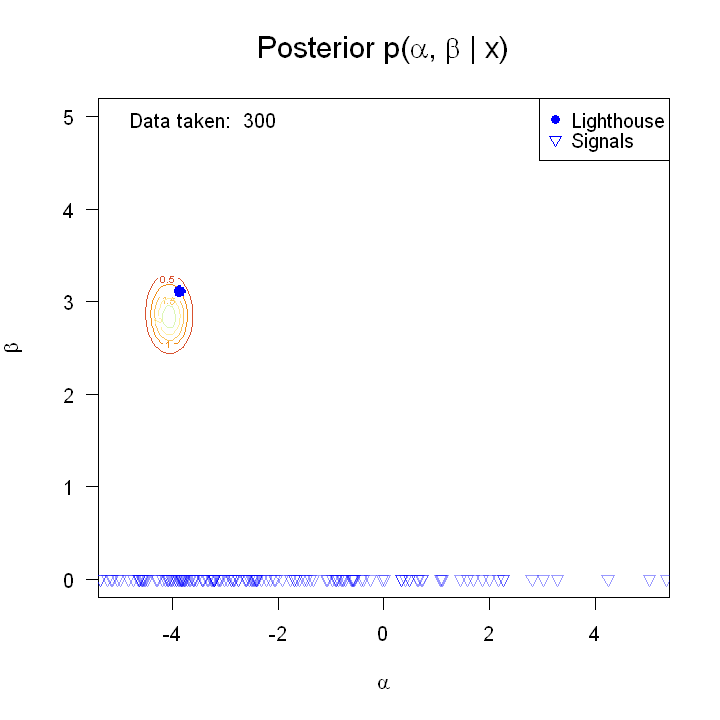

In [8]:
# Usefull functions
seed <- 1234
data.generation <- function(n){
    set.seed(seed)
    # random theta values
    theta.k <- runif(n, min = -pi/2, max = pi/2)
    # xk transformation
    x.k <- B*tan(theta.k)+A   
    return (x.k)
    }

likelihood.log <- function (data, alpha, beta) {
        L <- 0
        for (x in data) {
            L <- L + log((beta/pi) / (beta^2 + (x - alpha)^2))
        }
        return(L)
    }

# alpha beta range
a_range <- c(-5, 5)
b_range <- c(0,5)
set.seed(seed)
A <- runif(1, a_range[1], a_range[2])
B <- runif(1, b_range[1], b_range[2])

# Data generation
many_data.str <- readline("How many data do you want to generate ? (data will be visualized in 5 steps) ")
many_data.num <- as.numeric(unlist(strsplit(many_data.str, ",")))
signals <- data.generation(many_data.num)

#dividing visualization in 5 levels
levels <- as.integer(seq(5, many_data.num, length.out = 5))
levels
for (num.data in levels){
    dt <- signals[1:num.data] 
    
    # Plot Grid
    samples <- 100 
    delta.a <- diff(a_range)/samples
    delta.b <- diff(b_range)/samples
    alpha <- seq(from = a_range[1], by=delta.a, length.out=samples+1)
    beta  <- seq(from=b_range[1], by=delta.b, length.out=samples+1)
    
    posterior.star <- outer(alpha, beta, partial(likelihood.log, data = dt))
    #setting the maximum to 0
    posterior.star <- posterior.star - max(posterior.star)
    #simplify the log using exponential
    posterior <- exp(posterior.star)/(delta.a*delta.b*sum(exp(posterior.star)))
    
    # Plot 
    options(repr.plot.width=6, repr.plot.height=6) 
    contour(alpha, beta, posterior, las=1, labcex=0.5,
            col = hcl.colors(10, "Spectral"), nlevels = 5, lwd=1.5, cex.main= 1.5, cex.lab=1,
            xlab=expression(alpha), ylab=expression(beta), 
            main=expression(paste('Posterior p(', alpha, ', ', beta,' | x)')) )
    points(A, B, pch=10, col="blue", lwd=3.5)
    legend("topleft", bty='n', paste("Data taken: ",num.data)) 
    
    #signals received along the shore
    for (i in 1:num.data){
        points(signals[i], 0, pch=6, lwd=1.5,
              col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))
    }
    legend("topright", c("Lighthouse","Signals"), col="blue", pch=c(19,6)) 

}

### Exercise 3
**a)**

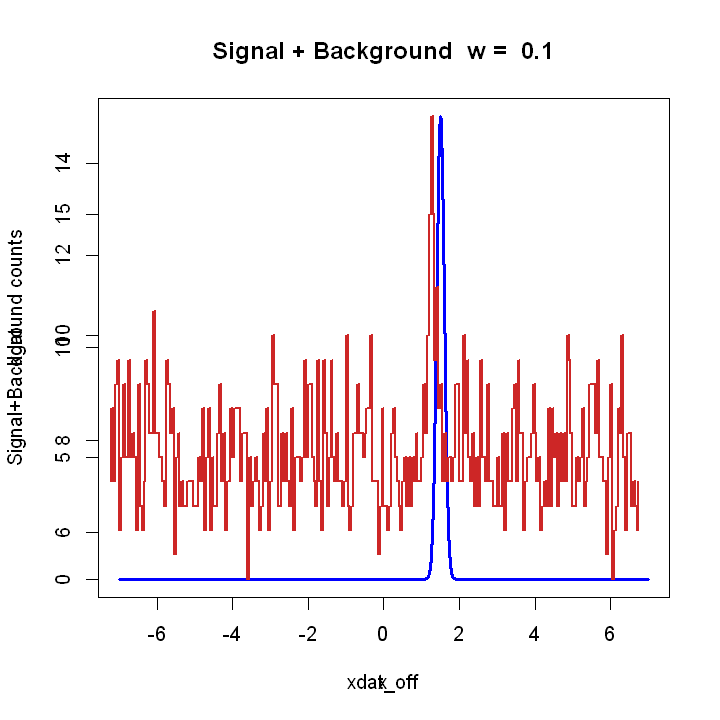

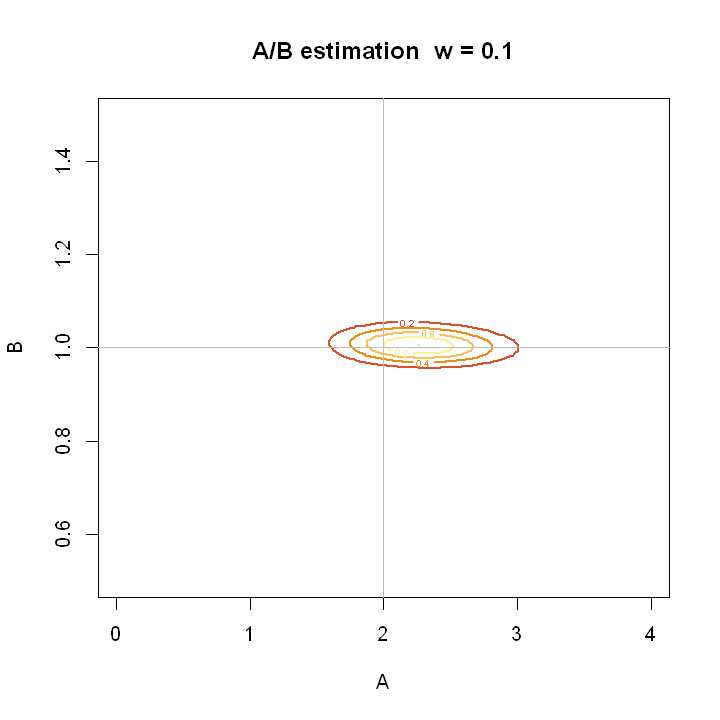

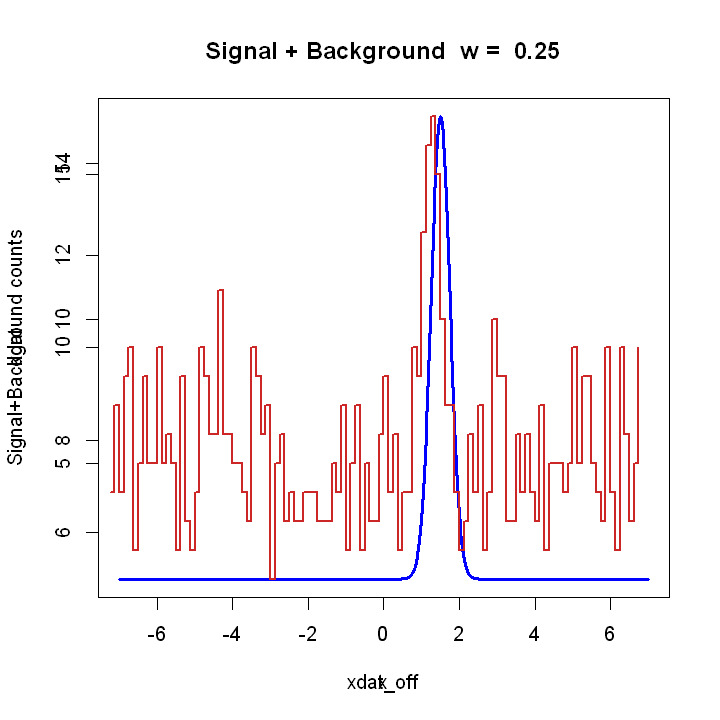

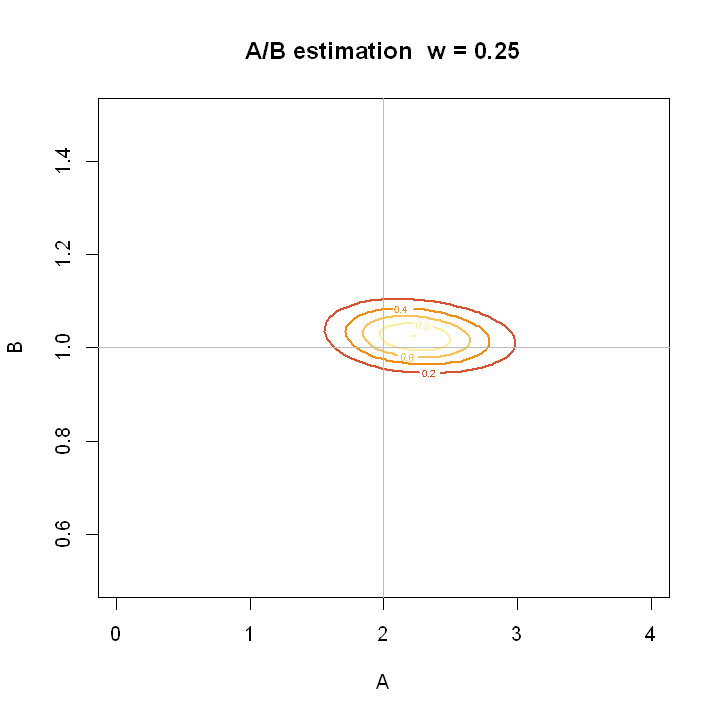

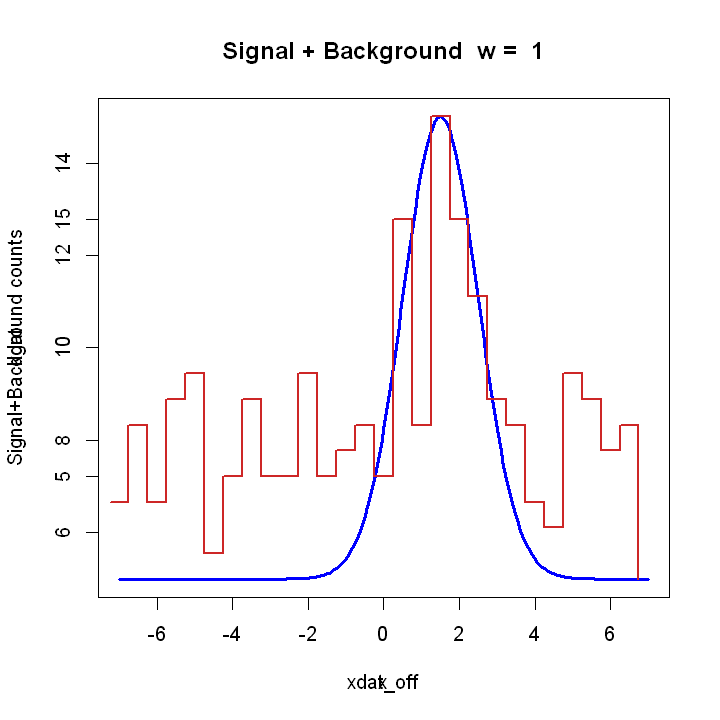

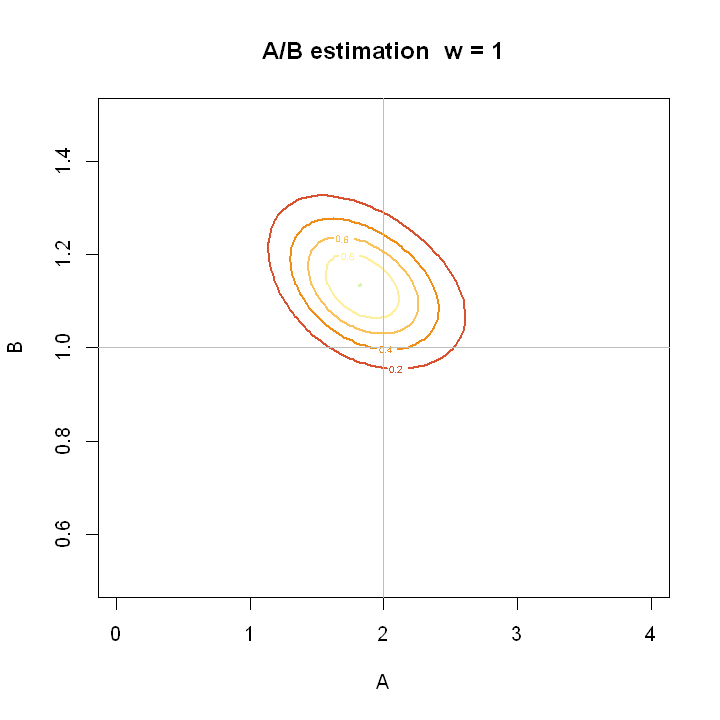

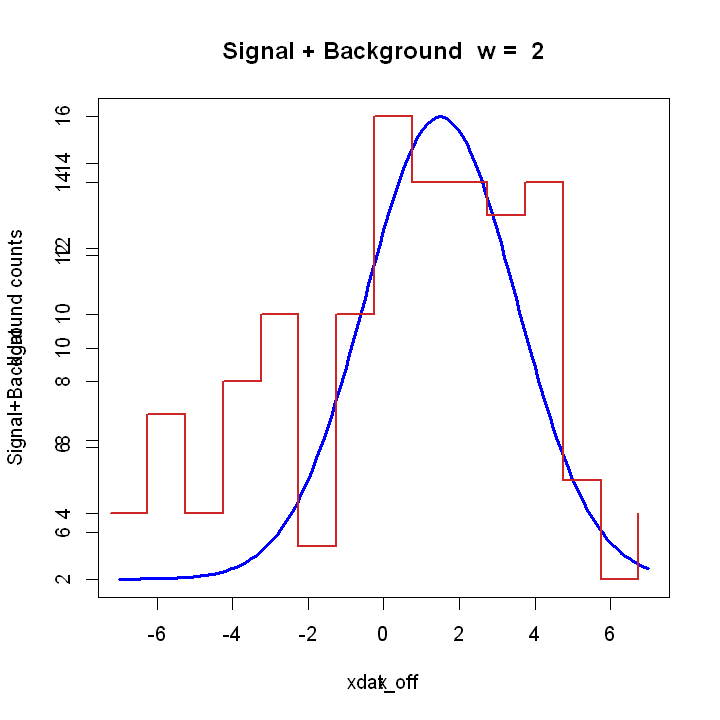

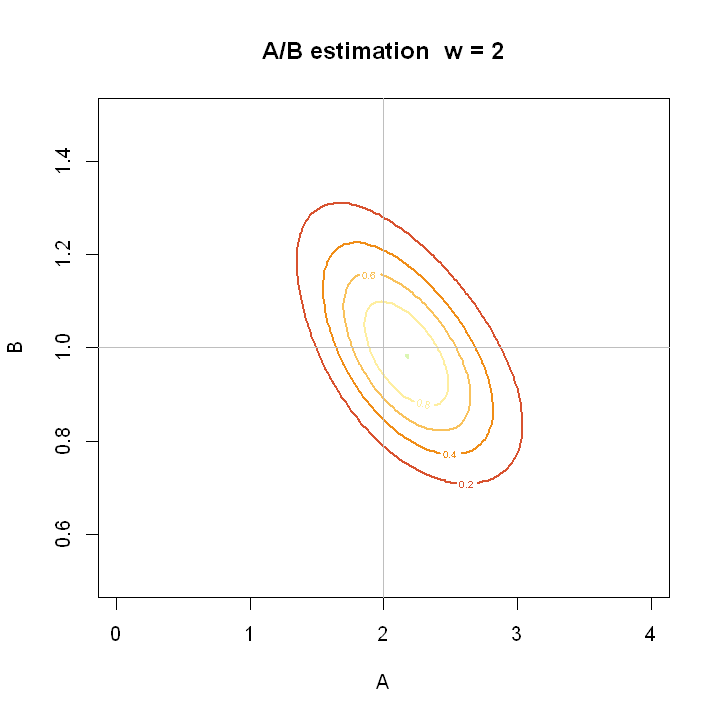

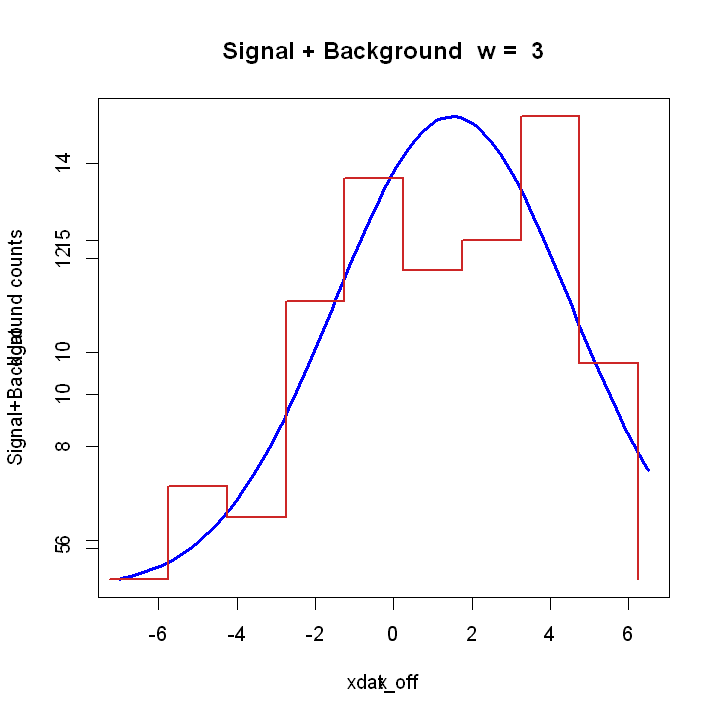

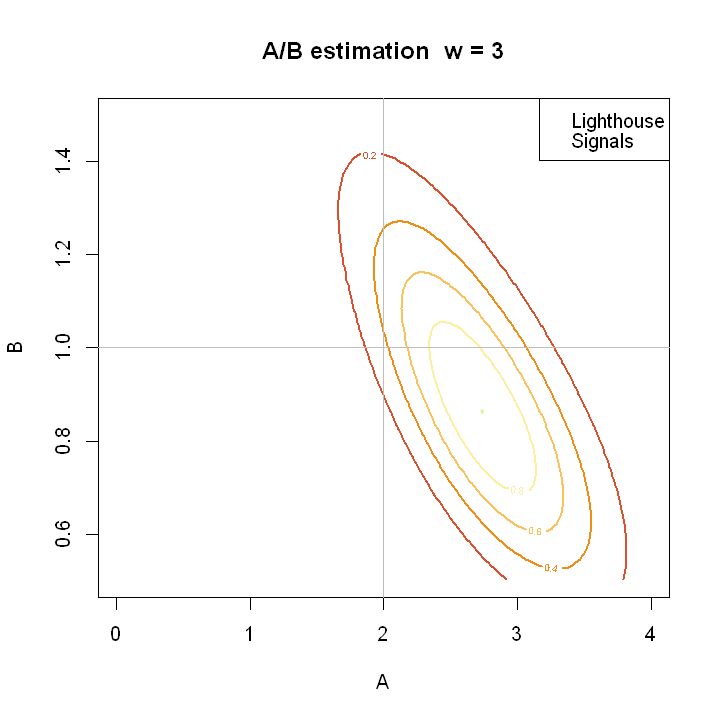

In [9]:
seed3 <- 123
set.seed(seed3)

# Usefull functions

signal <- function(x, a, b, x0, w, t) {  # Signal Generative model
  sig <- t*(a*exp(-(x-x0)^2/(2*w^2))+b)
  return(sig)
}

log_post <- function(d, x, a, b, x0, w, t) {  # Log posterior
    if(a<0 || b <0) {return(-Inf )} 
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

# Define model parameters (w changing between certain values)
x0 <- 1.5 # Signal peak
A_true <- 2 # Signal amplitude
B_true <- 1 # Background amplitude
Delta_t <- 5 # Exposure time
samp_range <- 1

# Sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
delta_a <- diff(alim)/Nsamp 
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid 
b <- blim[1] + diff(blim)*uniGrid

z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
ww <- c(0.1, 0.25, 1, 2, 3)
for (w in ww) {
# - Generate the observed data
set.seed(seed3)
xdat <- seq(from=-7*samp_range, to=7*samp_range, by=0.5*w)
s_true <- signal(xdat , A_true , B_true , x0, w, Delta_t)
ddat <- rpois(length(s_true), s_true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot , A_true , B_true , x0, w, Delta_t)
plot(xplot , splot , main=paste('Signal + Background  w = ', w),
     xlab="x", ylab="Signal+Background counts", type='l', col='blue', lwd=2.5)
par(new=TRUE)
xdat_off <- xdat -0.25
plot(xdat_off, ddat , type='s',col='firebrick3',
lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat )))
    
# Compute log unnormalized posterior, z = ln P*(a,b|D), on a regular grid
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
    } 
  }
z <- z - max(z) # set maximum to zero
    
# Plot unnormalized 2D posterior
contour(a, b, exp(z),
        col = hcl.colors(10, "Spectral"),
        main=paste('A/B estimation  w =', w), nlevels = 5, labcex = 0.5, lwd = 2,
        xlab="A", ylab="B")
abline(v=2, h=1, col="grey")
}
legend("topright", c("Lighthouse","Signals"))

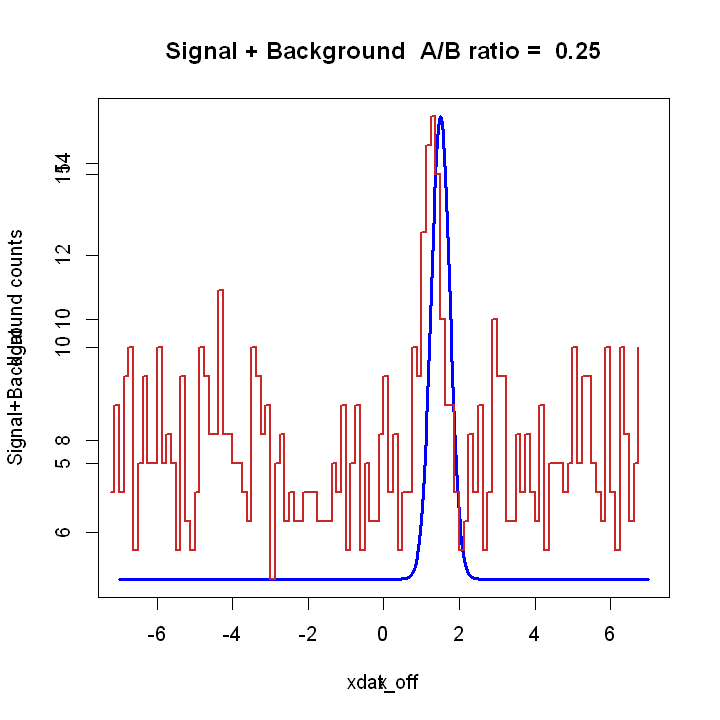

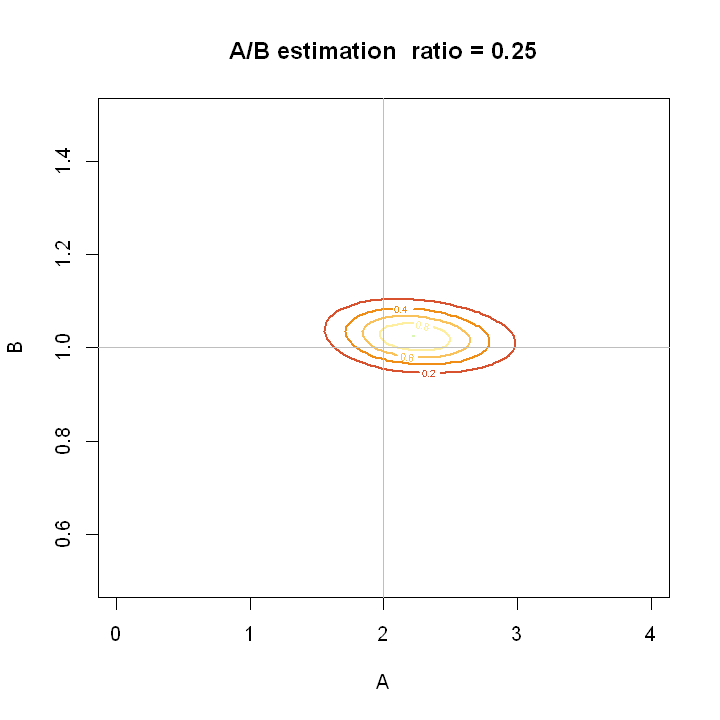

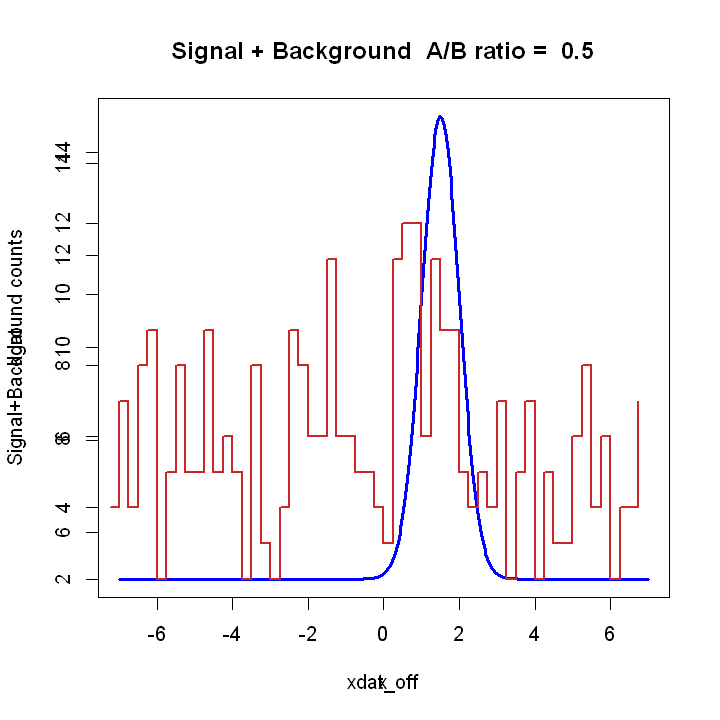

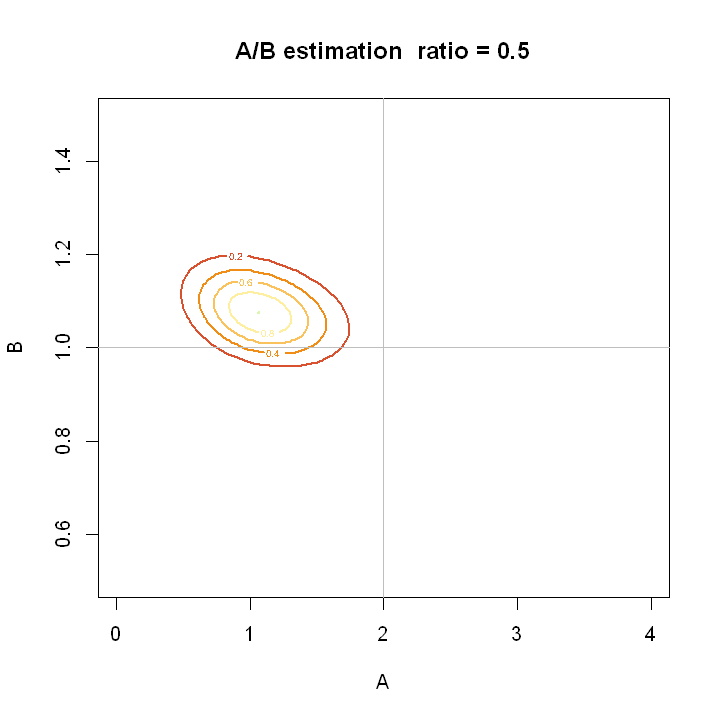

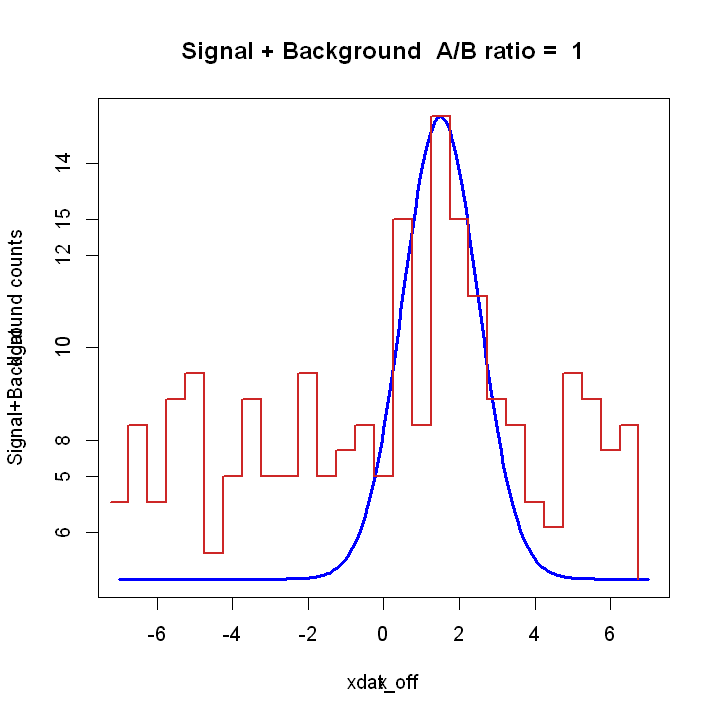

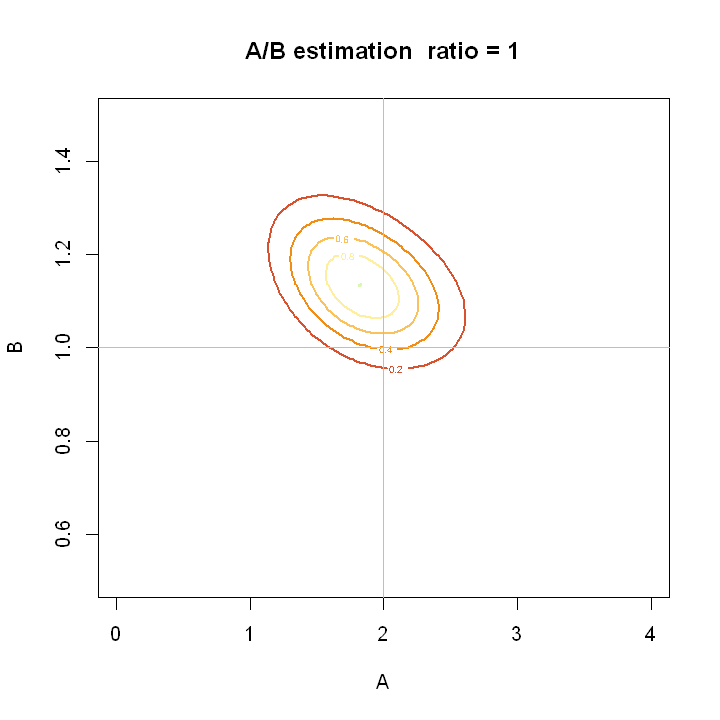

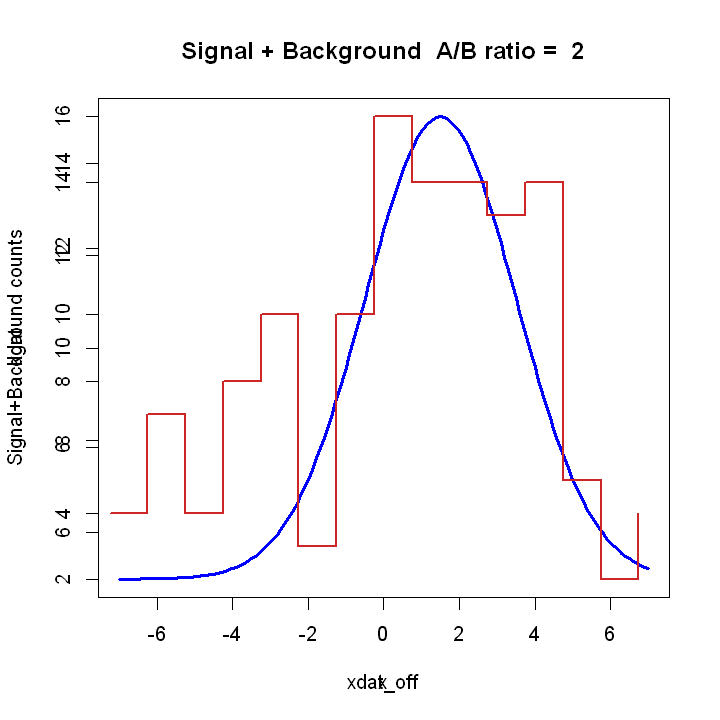

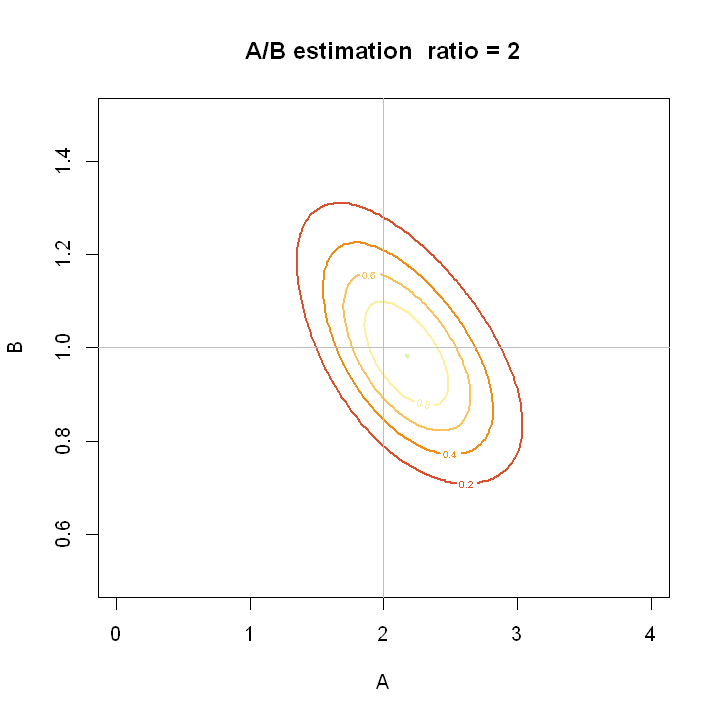

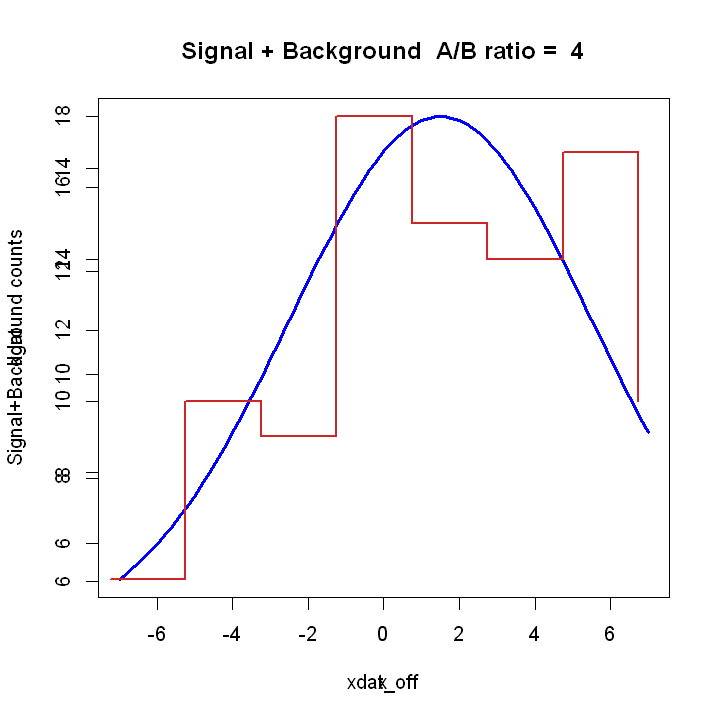

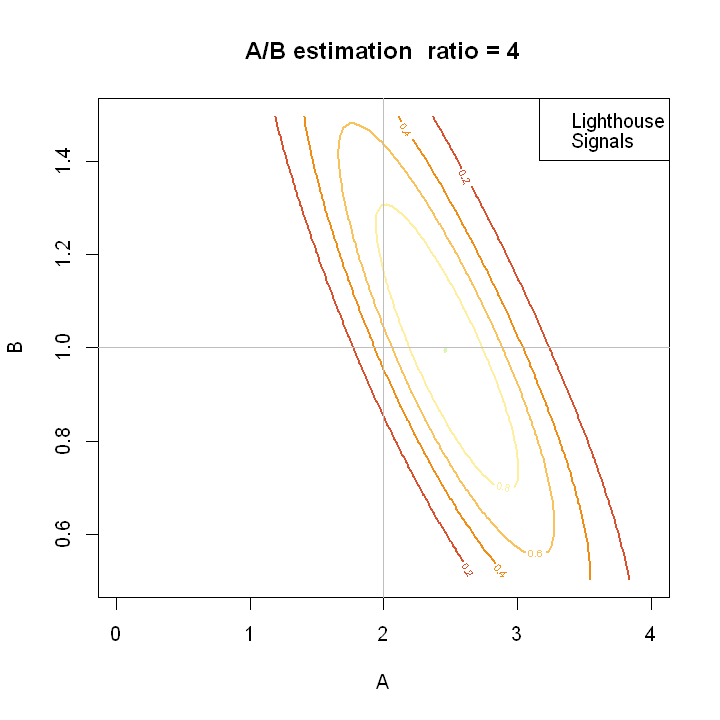

In [10]:
# Define model parameters (A changing between certain values to vary the A/B ratio)
# ...as in point a):  x0=1.5, B=1, Delta_t=5, samp_range=1
w <- 0.5 #resolution

# Sampling grid for computing posterior is already defined

z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
a_vector <- c(0.25, 0.5, 1, 2, 4)
for (a_value in a_vector) {
# - Generate the observed data
set.seed(seed3)
xdat <- seq(from=-7*samp_range, to=7*samp_range, by=0.5*a_value)
s_true <- signal(xdat , A_true , B_true , x0, a_value, Delta_t)
ddat <- rpois(length(s_true), s_true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*a_value)
splot <- signal(xplot , A_true , B_true , x0, a_value, Delta_t)
plot(xplot , splot , main=paste('Signal + Background  A/B ratio = ', a_value/B_true),
     xlab="x", ylab="Signal+Background counts", type='l', col='blue', lwd=2.5)
par(new=TRUE)
xdat_off <- xdat -0.25
plot(xdat_off, ddat , type='s',col='firebrick3',
lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat )))
    
# Compute log unnormalized posterior, z = ln Pˆ*(a,b|D), on a regular grid
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, a_value, Delta_t)
    } 
  }
z <- z - max(z) # set maximum to zero
    
# Plot unnormalized 2D posterior
contour(a, b, exp(z),
        col = hcl.colors(10, "Spectral"),
        main=paste('A/B estimation  ratio =', a_value/B_true),
        nlevels = 6, labcex = 0.5, lwd = 2,
        xlab="A", ylab="B")
abline(v=2, h=1, col="grey")
}
legend("topright", c("Lighthouse","Signals"))